# Лабораторная работа № 3.2

### Задача:

Построить кубический сплайн для функции, заданной в узлах интерполяции,
предполагая, что сплайн имеет нулевую кривизну при 
$x = x_0$ и 
$x = x_4$. Вычислить
значение функции в точке 
$x = X^*$.

In [1]:
import math

In [2]:
Table = [(-2, 0.13534), (-1, 0.36788), (0, 1), (1, 2.7183), (2, 7.3891)]

| Table |||
| :-------: | :-------: | :-------: |
| $$ i $$ | $$ x_{i} $$ | $$ y_{i} $$ |
| 0 | -2 | 0,13534 | 
| 1 | -1 | 0.36788 | 
| 2 | 0 | 1 |
| 3 | 1 | 2.7183 |
| 4 | 2 | 7.3891  |

$$ X^* = -0.5 $$

### Кубический сплайн

In [3]:
class CubicSpline():
    
    def __init__(self, table):
        self.table = list(sorted(table, key=lambda x: x[0]))
        self.coef = []
        
        if len(table) == 2:
            x0, y0, x1, y1 = self.table[0] + self.table[1]
            self.coef = [(y1, (y0-y1) / (x0-x1), 0, 0)]
            return
        
        matrix = [[], [], []]
        b = [0 for _ in range(len(self.table) - 2)]

        for i in range(1, len(self.table) - 1):
            x0, a0 = self.table[i - 1]
            x1, a1 = self.table[i]
            x2, a2 = self.table[i + 1]
            h1, h2 = x1 - x0, x2 - x1

            if 3 == len(self.table):
                matrix[1].append(2 * (h1 + h2))
            else:
                if i == 1:
                    matrix[1].append(2 * (h1 + h2))
                    matrix[2].append(h2)
                elif i == len(Table) - 2:
                    matrix[0].append(h1)
                    matrix[1].append(2 * (h1 + h2))
                else:
                    matrix[0].append(h1)
                    matrix[1].append(2 * (h1 + h2))
                    matrix[2].append(h2)

            b[i - 1] = 3 * (((a2 - a1) / h2) - ((a1 - a0) / h1))
        
        c = [0] + self._TMA(matrix, b) + [0]
        
        for i in range(1, len(Table)):
            h1 = self.table[i][0] - self.table[i - 1][0]
            a0 = self.table[i - 1][1]
            a1 = self.table[i][1]
            d1 = (c[i] - c[i - 1]) / (3 * h1)
            b1 = ((a1 - a0) / h1) + h1 * (2 * c[i] + c[i - 1]) / 3

            self.coef.append((a1, b1, c[i], d1))
        
    def _TMA(self, abc, d):
        if len(d) == 1:
            return [d[0] / abc[1][0]]
        dimension = len(d);
        result = [0 for i in range(dimension)]

        P = [0 for i in range(dimension)]
        Q = [0 for i in range(dimension)]
        P[0] = -(abc[2][0] / abc[1][0])
        Q[0] = (d[0] / abc[1][0])

        for i in range(1, dimension - 1):
            P[i] = -(abc[2][i] / (abc[1][i] + abc[0][i - 1] * P[i - 1]))
            Q[i] = ((d[i] - abc[0][i - 1] * Q[i - 1]) / (abc[1][i] + abc[0][i - 1] * P[i - 1]))


        result[dimension - 1] = ((d[dimension - 1] - abc[0][dimension - 2] * Q[dimension - 2]) / (abc[1][dimension - 1] + abc[0][dimension - 2] * P[dimension - 2]))

        for i in range(dimension - 1):
            k = dimension - 2 - i
            result[k] = P[k] * result[k + 1] + Q[k]

        return result
    
    def __call__(self, x):
        if x < self.table[0][0]:
            a, b, c, d = self.coef[0]
            x1 = self.table[1][0]
        elif x > self.table[-1][0]:
            a, b, c, d = self.coef[-1]
            x1 = self.table[-1][0]
        else:    
            for i in range(len(self.table) - 1):
                if self.table[i][0] <= x <= self.table[i + 1][0]:
                    a, b, c, d = self.coef[i]
                    x1 = self.table[i + 1][0]
                    break
                
        return a + b * (x - x1) + c * (x - x1)**2 + d * (x - x1)**3
    
    def plot_table(self):
        return list_plot(self.table)

In [4]:
CS = CubicSpline(Table)

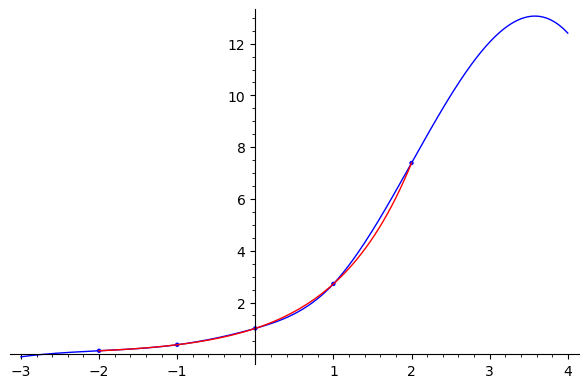

In [5]:
plot(CS, (-3, 4)) + CS.plot_table() + \
plot(__import__("numpy").exp, (-2, 2), color='red')

Значение функции в точке $X^*= -0.5$:

In [6]:
CS(-0.5)

0.626537946428571